Using this article as a basis: https://medium.com/analytics-vidhya/color-separation-in-an-image-using-kmeans-clustering-using-python-f994fa398454

In [3]:
import os
import cv2
import numpy as np
import matplotlib
from matplotlib import image
import matplotlib.pyplot as plt
import math

img_rgb = np.load("mini_data/images_rgb.npy")
img_gray = np.load("mini_data/images_gray.npy")
img_rgb_sum = np.load("mini_data/images_rgbsum.npy")

#print(np.shape(img_rgb[228][0]))


def calcSqDistances(X,Kmus):
  N = np.shape(X)[0]
  K = np.shape(Kmus)[0]
  dist_array = np.zeros((N,K), dtype = np.float64)
  for i in range(N):
   for j in range(K):
    dist_array[i,j] = np.linalg.norm(X[i] - Kmus[j])
  return dist_array
  #return((-2 * X @ Kmus.T + np.sum(Kmus * Kmus, axis = 1).T).T + np.sum(X * X, axis = 1)).T

def determineRnk(sqDmat):
  low = np.argmin(sqDmat, axis = 1)
  rnk = np.identity(sqDmat.shape[1])[low]
  return rnk

def recalcMus(X, Rnk):
    Kmus = np.zeros((len(Rnk[0]), 2))
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis=0))).T

def runKMeans(K):
    X = img_rgb
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    Kmus = np.zeros((K,D))

    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]
    

    for itr in range(1000):
        distmat = calcSqDistances(X, Kmus)

        rnk = determineRnk(distmat)

        mus_old = Kmus
        Kmus = recalcMus(X, rnk)
        if np.sum(np.abs(mus_old.reshape((-1,1)) - Kmus.reshape((-1,1)))) < 1e-6:
            break

    return Kmus

#def get_cluster_plot(Kmus, rows = 2): 
    '''
    : get a plot of what different clusters represent
    : takes as input the cluster location matrix
    '''
    fig,axs = plt.subplots(rows,5, figsize = (15,9))
    for i in range(len(Kmus)):
        cluster = Kmus[i].reshape(384, 512) * 255 
        axs[i//5][i%5].imshow(cluster, cmap = plt.cm.binary)
        axs[i//5][i%5].set_title(f'Cluster {i + 1}')


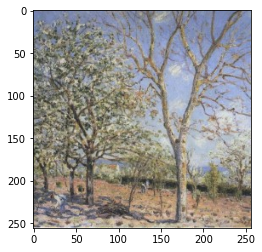

In [4]:
import cv2
img = cv2.imread('mini_data/images/Alfred_Sisley_29.jpg')
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
from sklearn.cluster import KMeans
img = img.reshape((img.shape[1]*img.shape[0],3))
kmeans = KMeans(n_clusters=5)
s = kmeans.fit(img)
labels = kmeans.labels_
print(labels)
labels = list(labels)

[1 1 1 ... 3 3 3]


In [7]:
centroid = kmeans.cluster_centers_
print(centroid)

[[ 89.23367733  85.28170021  74.89383877]
 [137.397737   145.16012171 171.22306741]
 [128.28156271 122.51339205 110.56690035]
 [183.4755681  186.4461607  192.92781821]
 [166.28540161 155.50586987 137.93002587]]


In [8]:
percent = []
for i in range(len(centroid)):
    j = labels.count(i)
    j = j/(len(labels))
    percent.append(j)
print(percent)

[0.1486968994140625, 0.160491943359375, 0.2543487548828125, 0.2058563232421875, 0.2306060791015625]


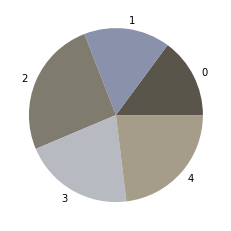

In [9]:
plt.pie(percent, colors = np.array(centroid/255), labels = np.arange(len(centroid)))
plt.show()